In [19]:
!pip install japanize-matplotlib

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
from scipy.stats import norm
from ipywidgets import interact, fixed
import warnings
import japanize_matplotlib

warnings.simplefilter('ignore')
# フォントおよびフォントサイズ
rcParams['font.family'] = 'Meiryo'
rcParams['font.size'] = 16.0


# カラーサイクルの設定
plt.rcParams['axes.prop_cycle'] = (
    plt.cycler('color', 
            # 上から優先順位が高い順になっています
               [
                '#1167A7', # 青色：メインカラー1
                '#F6A90E', # 黄色：メインカラー2
                '#ABB7B9', # 灰色：サブカラー1
                '#4DA9ED', # 薄い青色
                '#FBDD9F', # 薄い黄色
                '#CDD4D5', # 薄い灰色
                '#0D4D7D', # 濃い青色
                '#BC8007', # 濃い黄色
                '#7A8D91', # 濃い灰色
               ])
)
# 上記12色で対応できない場合は以下のマーカーで差別化してください 
# 優先度：'o'（〇）＞','（■）＞'v'（▲）＞'^'（▼）＞

# #C4240E, # 赤色：アクセントカラー1
# #1C1C1C', # 黒色：アクセントカラー2



%matplotlib inline

# **最尤法を図で理解する**

## **準備**

In [11]:
def log_likelihood(x_data, mu, sigma):
    """対数尤度を計算する関数

    Args:
        x_data (ndarray): 確率変数xの値が入った配列
        mu (float): 正規分布の平均値
        sigma (float): 正規分布の標準偏差

    Returns:
        -l: 対数尤度の絶対値
    """
    l = 0 #尤度の初期値
    for x in x_data:
        # model output 
        p = np.prod(norm.pdf(x, loc=mu, scale=sigma))
        # likelihood 尤度
        l += np.log(p) #尤度
    return -l

In [12]:
np.random.seed(1)          # 予めseed値を固定する
r = np.random.normal(loc=10, scale=6.0, size=1000)  # ヒストグラムの用意

# mu, sigmaを変更した時にグラフの赤点プロットが描く軌跡を事前に用意している。
result_x_mu=[]
result_y_mu=[]
result_x_sigma=[]
result_y_sigma=[]

sigma=6
for mu in np.linspace(-10,30, 50):
    result_y_mu+=[log_likelihood(r, mu, sigma)]
    result_x_mu+=[mu]
    
mu=10   
for sigma in np.linspace(1,30, 60):
    result_y_sigma+=[log_likelihood(r, mu, sigma)]
    result_x_sigma+=[sigma]   
    

## **最尤法実践**

【実験】  
- 任意のガウス分布に従う母集団から 1000 個のデータをランダムにサンプリング。
- 尤度の値をもとにして、ガウス分布のパラメータ(平均値、分散)を推定する。

【確認事項】
- うまく回帰が出来ている時ほど尤度が小さくなることを確認する。

In [13]:
def try_likelihood(mu,sigma,opti_val):
    """ヒストグラムと正規分布を照らし合わせて尤度を計算し、描画する関数

    Args:
        mu (float): 正規分布の平均値
        sigma (float): 正規の分布の標準偏差
        opti_val (int): 最適化したいパラメーター種 (0: 平均値, 1: 標準偏差)
    """
    g_curve_x = np.linspace(-10,30, 100)
    g_curve_y = norm.pdf(g_curve_x, loc=mu, scale=sigma)
    
    fig,ax = plt.subplots(1,2, dpi=100, figsize=(16, 6))
    
    ax[0].set_xlabel("x-axis")
    ax[0].set_ylabel("probability")
    ax[0].plot(g_curve_x, g_curve_y, label=f"mu:4, sigma:6, log likelihood:{log_likelihood(r, mu, sigma):.4}")
    ax[0].hist(r, bins='auto', density=True)#xをヒストグラムにプロットする。ヒストグラムの本数は'auto'
    ax[0].legend(prop={"size": 14})
    ax[0].set_xlim(-10,30)
    ax[0].set_ylim(0,0.1)
    

    if opti_val==0:
        ax[1].plot(result_x_mu,result_y_mu)
        ax[1].scatter([mu],[log_likelihood(r, mu, sigma)],color="red")
        ax[1].set_xlabel("mu")        
    else:
        ax[1].plot(result_x_sigma,result_y_sigma)
        ax[1].scatter([sigma],[log_likelihood(r, mu, sigma)],color="red")
        ax[1].set_xlabel("sigma")
    ax[1].set_ylabel("Likelihood")
    
    plt.show()#グラフを表示

### 平均値を調整してみる(分散は固定値)

In [14]:
interact(try_likelihood, mu=(-10,30,0.5), sigma=fixed(6), opti_val=fixed(0))

interactive(children=(FloatSlider(value=10.0, description='mu', max=30.0, min=-10.0, step=0.5), Output()), _do…

<function __main__.try_likelihood(mu, sigma, opti_val)>

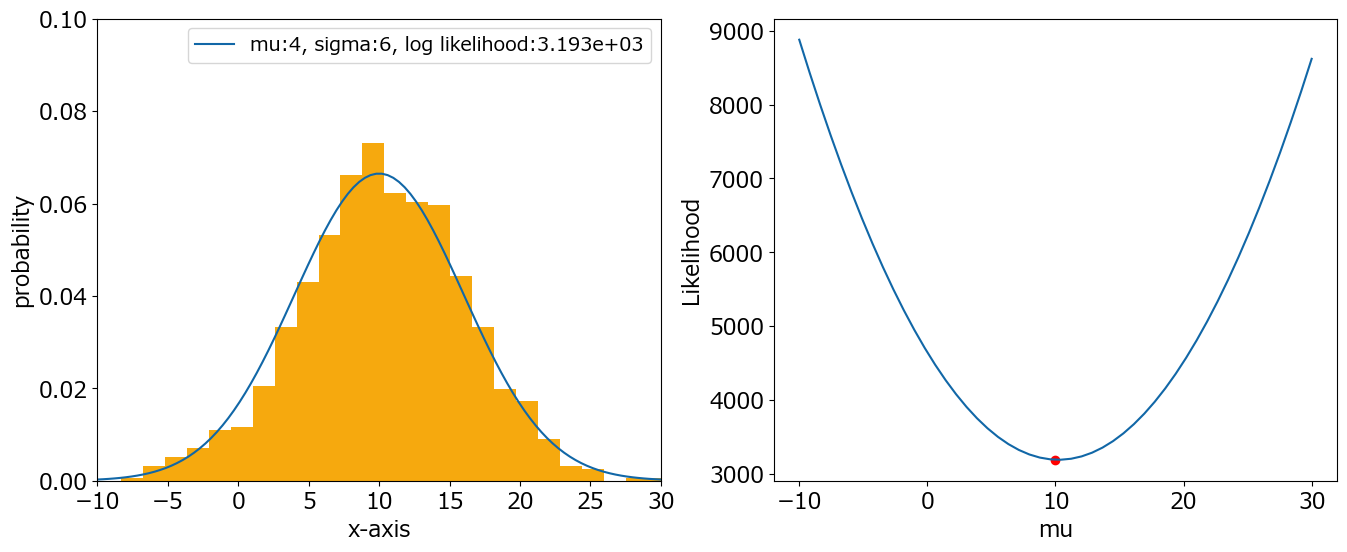

In [16]:
##-- 変更する変数 --##
mu = 10 #平均値
##------------------##
SIGMA = 6
try_likelihood(mu, SIGMA, 0)

### 分散を調整してみる(平均値は固定値)

In [17]:
interact(try_likelihood, mu=fixed(10), sigma=(1,30,0.5), opti_val=fixed(1)) # ここを変更する (start, end, step)

interactive(children=(FloatSlider(value=15.0, description='sigma', max=30.0, min=1.0, step=0.5), Output()), _d…

<function __main__.try_likelihood(mu, sigma, opti_val)>

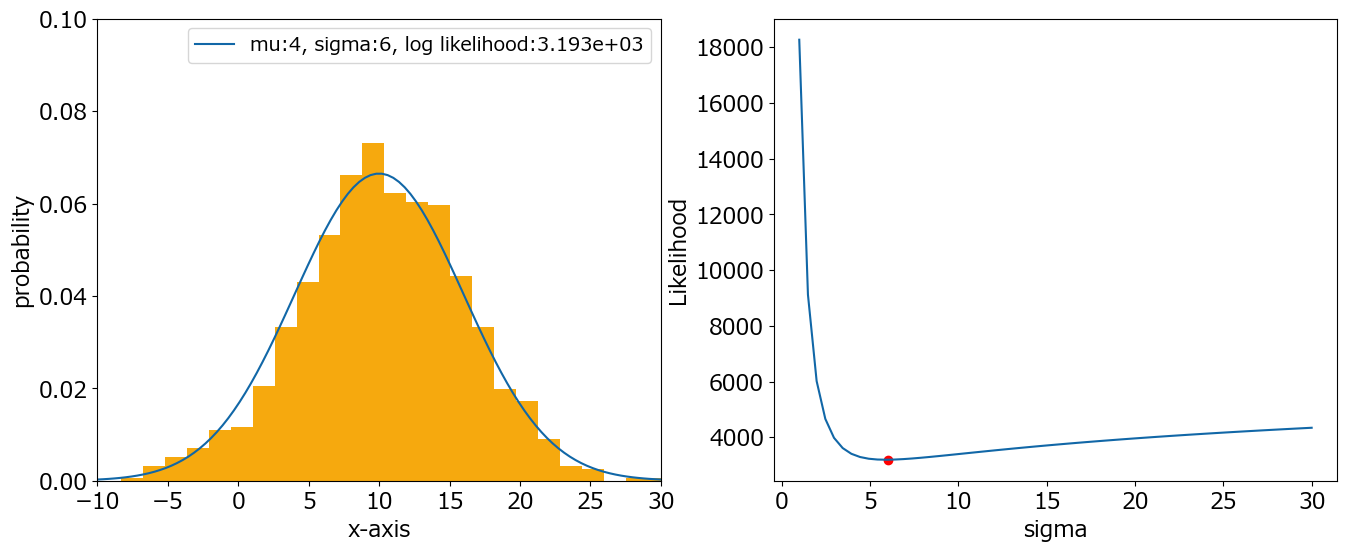

In [18]:
##-- 変更する変数 --##
sigma = 6 #分散
##------------------##
MU = 10
try_likelihood(MU, sigma, 1)